In [1]:
from tools import *
import numpy as np
import matplotlib.pyplot as plt
#data = np.load("15_scenes_Xy.npz","rb")

In [2]:
X,Y = np.load("X.npy"),np.load("y.npy")

In [3]:
#X,Y = data["X"],data["y"]

In [4]:
nottest_ids,test_ids = compute_split(len(X),pc = 0.8)
X_nottest,Y_nottest = X[nottest_ids],Y[nottest_ids]
X_test,Y_test = X[test_ids],Y[test_ids]
train_ids,valid_ids = compute_split(len(X_nottest),pc = 7./8)
X_train,Y_train = X_nottest[train_ids],Y_nottest[train_ids]
X_valid,Y_valid = X_nottest[valid_ids],Y_nottest[valid_ids]

In [20]:
from sklearn import svm
C = np.arange(1,60,2)
train_scores = []
valid_scores = []
test_scores = []
for c in C:
    clf = svm.SVC(C=c,gamma='scale',decision_function_shape='ovr')
    clf.fit(X_train,Y_train)
    train_scores.append(clf.score(X_train,Y_train))
    valid_scores.append(clf.score(X_valid,Y_valid))
    test_scores.append(clf.score(X_test,Y_test))

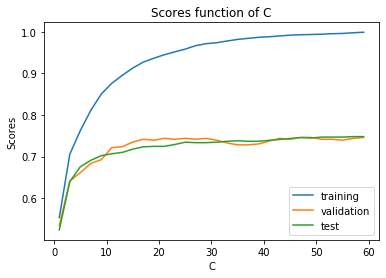

In [21]:
#plt.plot(C,train_scores,label = 'train')
plt.title('Scores function of C')
plt.xlabel('C')
plt.ylabel('Scores')
plt.plot(C,train_scores,label='training')
plt.plot(C,valid_scores, label = 'validation')
plt.plot(C,test_scores, label = 'test')
plt.legend()
plt.savefig('Scores')
plt.show()

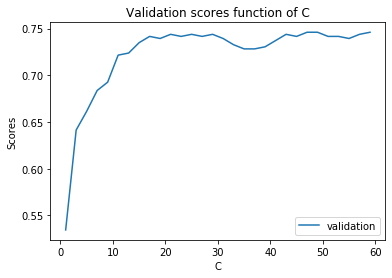

In [22]:
plt.title('Validation scores function of C')
plt.xlabel('C')
plt.ylabel('Scores')
plt.plot(C,valid_scores, label = 'validation')
plt.legend()
plt.savefig('Validation scores')
plt.show()

In [11]:
c_final = C[np.argmax(np.array(valid_scores))]
print("c final : ",c_final)
print("score test final : ",test_scores[np.argmax(np.array(valid_scores))])

c final :  47
score test final :  0.745819397993311
